In [1]:
import os
import argparse
import gym
import numpy as np
import torch
import torch.cuda
import torch.multiprocessing as _mp

from utils.font_color import color
from models.actor_critic import ActorCritic
from common.atari_wrapper import create_mario_env
from optimizer.sharedadam import SharedAdam
from trainer.a3c.train import train, test
from common.mario_actions import ACTIONS


In [2]:
env_name='SuperMarioBrosNoFrameskip-1-1-v0'
save_path='.//save/trained-models/curiosity/mario_a3c_params.pkl'

In [3]:
env = create_mario_env(env_name, reward_type='dense')
shared_model = ActorCritic(
        env.observation_space.shape[0], len(ACTIONS))

shared_model.share_memory()
shared_model.load_state_dict(torch.load(save_path))


In [4]:
from gym.wrappers import Monitor

# env = Monitor(env, './video/')

import torch
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

FloatTensor = torch.FloatTensor

cx = Variable(torch.zeros(1, 512),  requires_grad=True ).type(FloatTensor)
with torch.no_grad(): cx=cx
hx = Variable(torch.zeros(1, 512),  requires_grad=True).type(FloatTensor)
with torch.no_grad(): hx=hx

In [5]:
state = env.reset()
state = torch.from_numpy(state)
with torch.no_grad(): state_inp = Variable(state.unsqueeze(0)).type(FloatTensor)
    
for step in range(1000):
    value,action, (hx,cx) = shared_model.forward((state_inp,(hx,cx))) 
    action = np.argmax(action.data.numpy())
    state, reward, done, info = env.step(action)
    state = torch.from_numpy(state)
    with torch.no_grad():
        state_inp = Variable(state.unsqueeze(0)).type(FloatTensor)

    env.render()
    if done : break

env.close()

In [7]:
import pandas as pd  
import matplotlib.pyplot as plt 
df = pd.read_csv('./save/trained-models/curiosity/mario_curves.csv')
df2 = pd.read_csv('./save/default_dense/mario_curves.csv')
# df = df.drop(df.loc[df['Total Reward'] == 'Total Reward' ].index)
#df2 = df2.drop(df2.loc[df2['Total Reward'] == 'Total Reward' ].index)
df['Total Reward'] = df['Total Reward'].astype(float)
df2['Total Reward'] = df2['Total Reward'].astype(float)
plt.plot(df['Total Reward'], c ='blue')
plt.plot(df2['Total Reward'], c ='red')

plt.show()

FileNotFoundError: File b'./save/default_dense/mario_curves.csv' does not exist

In [319]:
import glob 
import pandas as pd
path ='./save/' # use your path
#default = glob.glob(path + "default_dense/train*.csv")
curiosity = glob.glob(path + "curiosity_sparse/train*.csv")

In [ ]:
list_ = []

for file_ in curiosity:
    df = pd.read_csv(file_, header=None)
    list_.append(df.iloc[:,1])

frame_cur = pd.concat(list_, axis = 1, ignore_index = True)

In [315]:
# list_ = []

# for file_ in default:
#     df = pd.read_csv(file_, header=None)
#     list_.append(df)

# frame_def = pd.concat(list_, axis = 1, ignore_index = True)

In [316]:
means_cur = np.nanmean(frame_cur.values, axis=1)
std_cur = np.nanstd(frame_cur.values, axis=1)
maxi_cur = np.nanmax(frame_cur.values, axis=1)
mini_cur = np.nanmin(frame_cur.values, axis=1)
n_itr_cur = frame_cur.shape[0]

In [317]:
# means_def = np.nanmean(frame_def.values, axis=1)
# std_def = np.nanstd(frame_def.values, axis=1)
# maxi_def = np.nanmax(frame_def.values, axis=1)
# mini_def = np.nanmin(frame_def.values, axis=1)
# n_itr_def = frame_def.shape[0]
import matplotlib.pyplot as plt

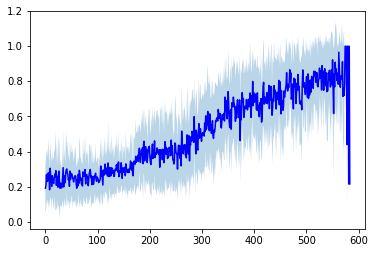

In [318]:
plt.plot(means_cur, color='blue')
plt.fill_between(np.arange(n_itr_cur), means_cur + std_cur, means_cur - std_cur , alpha=0.3 )
# plt.plot(means_def[:-10], color='red')
# plt.fill_between(np.arange(n_itr_def), means_def + std_def, means_def - std_def , alpha=0.3 )
plt.show()

In [155]:
len(means_cur)

139

In [112]:
std_cur[-50:].mean()

0.004425814615627966

In [82]:
std_def[-50:].mean()

NameError: name 'std_def' is not defined

In [91]:
means_cur

array([0.12562068, 0.14018679, 0.17623757, 0.15964953, 0.1682324 ,
       0.14810943, 0.15469788, 0.15076407, 0.18589329, 0.16317071,
       0.19323824, 0.18942822, 0.18842414, 0.17911228, 0.20290772,
       0.21095416, 0.19825867, 0.20887721, 0.21817532, 0.19993673,
       0.19226167, 0.20527351, 0.21319615, 0.20470957, 0.20542481,
       0.20671774, 0.20370549, 0.24474919, 0.21047275, 0.19686946,
       0.19138137, 0.25568408, 0.17765429, 0.18717247, 0.22513514,
       0.23253511, 0.19953785, 0.21215081, 0.19967539, 0.2304169 ,
       0.19455868, 0.18843789, 0.2033066 , 0.19154643, 0.21297608,
       0.22198534, 0.20897349, 0.2310221 , 0.21268723, 0.24402019,
       0.21406269, 0.17321156, 0.20560362, 0.22631803, 0.22045858,
       0.22374593, 0.19627801, 0.19962037, 0.24891683, 0.25657813,
       0.25313949, 0.20439322, 0.22902769, 0.22677194, 0.26422569,
       0.21788647, 0.30218836, 0.21755636, 0.25653687, 0.27895685,
       0.25000344, 0.26985131, 0.27811782, 0.24937073, 0.26646